**PROGRAMMING ASSIGNMENT**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras_preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils

Using TensorFlow backend.


**Downloading Dataset**

In [3]:
!wget "https://s3-us-west-1.amazonaws.com/places-image-dataset/Image/Dataset.zip"
!unzip Dataset.zip

--2018-11-20 22:28:47--  https://s3-us-west-1.amazonaws.com/places-image-dataset/Image/Dataset.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 54.231.237.29
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|54.231.237.29|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2018-11-20 22:28:47 ERROR 403: Forbidden.

unzip:  cannot find or open Dataset.zip, Dataset.zip.zip or Dataset.zip.ZIP.


In [2]:
from glob import glob
CATEGORIES = glob("Dataset/Train/*")

for i in  range(len(CATEGORIES)):
    CATEGORIES[i] = CATEGORIES[i][14:]
    print(CATEGORIES[i])
    
DATADIR_train = "Dataset/Train/"
DATADIR_valid = "Dataset/Valid/"
DATADIR_test = "Dataset/Test/"


cloister
livingroom
hospitalroom
poolinside
laboratorywet
movietheater
buffet
shoeshop
kitchen
mall
computerroom
toystore
laundromat
children_room
clothingstore
restaurant_kitchen
studiomusic
bathroom
bowling
office
restaurant
bar
videostore
gym
airport_inside
grocerystore
operating_room
auditorium
pantry
bedroom
subway
waitingroom
closet
garage
dining_room
kindergarden
dentaloffice
meeting_room
bookstore
casino
locker_room
tv_studio
concert_hall
warehouse
inside_subway
artstudio
florist
gameroom
lobby
library
hairsalon
church_inside
museum
trainstation
elevator
nursery
prisoncell
deli
bakery
stairscase
winecellar
inside_bus
corridor
jewelleryshop
fastfood_restaurant
greenhouse
classroom


**Plotting data**

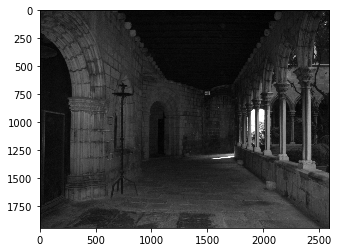

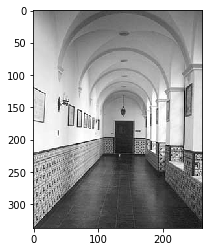

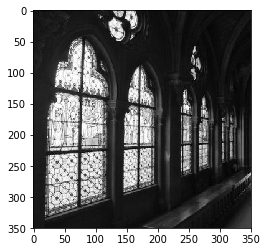

In [3]:
def plot_first(DATADIR_train):
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_train, categories)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap='gray')
            plt.show()
            break
        break

plot_first(DATADIR_train)
plot_first(DATADIR_valid)
plot_first(DATADIR_test)

**Processing and saving data into variables**

In [4]:
img_size = 100
training_data = []
validation_data = []
testing_data = []

def create_training_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_train, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
def create_validation_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_valid, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array, class_num])
            except Exception as e:
                pass
            
def create_testing_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_test, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()
create_validation_data()
create_testing_data()

In [5]:
print(len(training_data))
print(len(validation_data))
print(len(testing_data))

10970
2310
2310


In [6]:
import random
random.shuffle(training_data)
random.shuffle(validation_data)
random.shuffle(testing_data)

**Plotting processed data** 

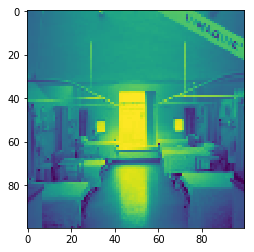

-------------- 2 -------------


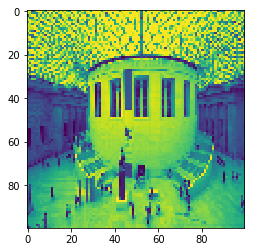

-------------- 52 -------------


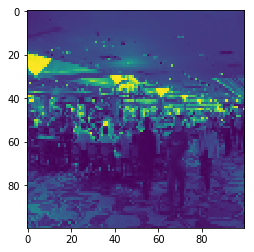

-------------- 39 -------------


In [7]:
def visualize(training_data):
    for sample in training_data[:1]:
        plt.imshow(sample[0])
        plt.show()
        print("--------------",sample[1],"-------------")  

visualize(training_data)
visualize(validation_data)
visualize(testing_data)

In [8]:
x_train = []
y_train = []
for features,label in training_data:
    x_train.append(features)
    y_train.append(label)
 
x_valid = []
y_valid = []
for features,label in validation_data:
    x_valid.append(features)
    y_valid.append(label)

x_test = []
y_test = []
for features,label in testing_data:
    x_test.append(features)
    y_test.append(label)
    

X_train = np.array(x_train).reshape(-1,img_size,img_size,1)
X_valid = np.array(x_valid).reshape(-1,img_size,img_size,1)
X_test = np.array(x_test).reshape(-1,img_size,img_size,1)

In [9]:
X_train = X_train.astype('float32')
X_train /= 255
print(X_train.shape)
print(X_train.shape[0], 'train_samples')

(10970, 100, 100, 1)
10970 train_samples


In [10]:
X_valid = X_valid.astype('float32')
X_valid /= 255
print(X_valid.shape)
print(X_valid.shape[0], 'valid_samples')

(2310, 100, 100, 1)
2310 valid_samples


In [11]:
X_test = X_test.astype('float32')
X_test /= 255
print(X_test.shape)
print(X_test.shape[0], 'test_samples')

(2310, 100, 100, 1)
2310 test_samples


In [12]:
Y_train = np_utils.to_categorical(y_train,67)
Y_valid = np_utils.to_categorical(y_valid,67)
Y_test = np_utils.to_categorical(y_test,67)

**Creating the model**

In [13]:
batch_size = 25
epochs = 20
channels = 1
conv = 3
maxpool = 2
filters = 32
classes = 67

model = Sequential() 
model.add(Convolution2D(filters,(conv,conv),border_mode='valid',input_shape=(img_size,img_size,1)))
convout1=Activation('relu')
model.add(convout1)
model.add(Convolution2D(filters,conv,conv))
convout2=Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size= (maxpool, maxpool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
__________

/home/student/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(100, 100,...)`
  # Remove the CWD from sys.path while we load stuff.
/home/student/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  del sys.path[0]


**Training the model**

In [14]:
import time

t0= time.time()
history = model.fit(X_train,Y_train,batch_size=batch_size,nb_epoch=epochs, 
          verbose=1,validation_data=(X_valid,Y_valid))

print(time.time()-t0)

/home/student/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 10970 samples, validate on 2310 samples
Epoch 1/20
10970/10970 [==============================] - 10s 891us/step - loss: 3.9722 - acc: 0.0567 - val_loss: 3.7615 - val_acc: 0.0814
Epoch 2/20
10970/10970 [==============================] - 8s 714us/step - loss: 3.6367 - acc: 0.1113 - val_loss: 3.4986 - val_acc: 0.1143
Epoch 3/20
10970/10970 [==============================] - 8s 713us/step - loss: 3.1824 - acc: 0.1968 - val_loss: 3.3173 - val_acc: 0.1684
Epoch 4/20
10970/10970 [==============================] - 8s 722us/step - loss: 2.5586 - acc: 0.3187 - val_loss: 3.4182 - val_acc: 0.1658
Epoch 5/20
10970/10970 [==============================] - 8s 711us/step - loss: 1.9616 - acc: 0.4516 - val_loss: 3.6230 - val_acc: 0.1615
Epoch 6/20
10970/10970 [==============================] - 8s 718us/step - loss: 1.4487 - acc: 0.5795 - val_loss: 4.0150 - val_acc: 0.1541
Epoch 7/20
10970/10970 [==============================] - 8s 714us/step - loss: 1.1096 - acc: 0.6608 - val_loss: 4.2725 - 

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])


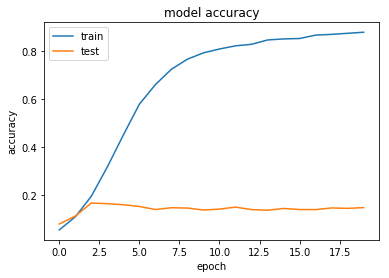

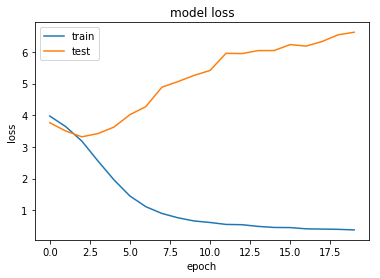

In [15]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("./fig1.pdf", format="pdf", dpi=1000 )
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluating the model**

In [19]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  6.7970088979382535
Test accuracy:  0.1341991341991342


In [19]:
print(model.predict_classeTrain on 10970 samples, validate on 2310 samples
Epoch 1/20
10970/10970 [==============================] - 21s 2ms/step - loss: 3.9184 - acc: 0.0685 - val_loss: 3.6848 - val_acc: 0.1000
Epoch 2/20
10970/10970 [==============================] - 20s 2ms/step - loss: 3.5382 - acc: 0.1287 - val_loss: 3.4384 - val_acc: 0.1623
Epoch 3/20
10970/10970 [==============================] - 19s 2ms/step - loss: 2.9122 - acc: 0.2434 - val_loss: 3.3918 - val_acc: 0.1753
Epoch 4/20
10970/10970 [==============================] - 19s 2ms/step - loss: 2.1954 - acc: 0.3926 - val_loss: 3.6512 - val_acc: 0.1506
Epoch 5/20
10970/10970 [==============================] - 19s 2ms/step - loss: 1.6437 - acc: 0.5289 - val_loss: 3.8730 - val_acc: 0.1658
Epoch 6/20s(X_test[1:6]))
print(Y_test[1:6])

[ 1 44  8 20 30]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0